# Creating the Model

## Importing Libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

# For better visualization
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Loading and Prepocessing the Dataset

In [2]:
df =  pd.read_csv('mergedFiles/allFilesMerged.csv')
df.shape

(11500, 179)

### Selecting target

From the `y` column, we will consider value `1` as `seizure class` and other values as `non-seizure class`. For this we convert values other than `1` as `0`.

In [8]:
df["y"].replace([2,3,4,5],[0,0,0,0],inplace=True)
df['y'].value_counts()

0    9200
1    2300
Name: y, dtype: int64

### Selecting input and target columns

In [32]:
input_cols = df.columns[0:178]
target_col = df.columns[-1]

### Splitting Dataset into train, validation,test sets

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(df[input_cols],df[target_cols],test_size = 0.15, random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size = 0.2, random_state=42)

# Checking size
len(y_train),len(y_val), len(y_test)

(7820, 1725, 1955)

According to the size if the model predict all as `non-seizure` class, still it will have `79.76%` accuracy at validation set and `79.64%`

### Normalizing datasets

In [79]:
scaler = MinMaxScaler().fit(X_train)
X_train[input_cols] = scaler.transform(X_train[input_cols])
X_val[input_cols]  = scaler.transform(X_val[input_cols] )
X_test[input_cols]  = scaler.transform(X_test[input_cols])

X_train.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
count,7820.000000,7820.000000,7820.000000,7820.000000,7820.000000,7820.000000,7820.000000,7820.000000,7820.000000,7820.000000,...,7820.000000,7820.000000,7820.000000,7820.000000,7820.000000,7820.000000,7820.000000,7820.000000,7820.000000,7820.000000
mean,0.515765,0.536080,0.554697,0.566540,0.577878,0.598618,0.595898,0.576945,0.562119,0.550264,...,0.543234,0.532143,0.522298,0.473220,0.418796,0.373592,0.338038,0.344395,0.349233,0.361121
std,0.064028,0.059490,0.056489,0.054152,0.052809,0.053112,0.052039,0.050250,0.049499,0.049716,...,0.057204,0.058531,0.060124,0.058907,0.056088,0.053885,0.052274,0.048912,0.047216,0.046429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.501408,0.522597,0.541501,0.553658,0.565072,0.585569,0.583114,0.564484,0.549705,0.537672,...,0.530108,0.518801,0.509064,0.460077,0.405994,0.361496,0.326186,0.333440,0.338283,0.350570
50%,0.517202,0.537143,0.555417,0.566979,0.578144,0.598678,0.595746,0.576560,0.561677,0.549656,...,0.544269,0.533284,0.523476,0.474534,0.420205,0.375136,0.339463,0.345674,0.350644,0.362361
75%,0.532434,0.551138,0.568709,0.579418,0.590043,0.610799,0.607890,0.588327,0.573268,0.561376,...,0.557298,0.546817,0.537681,0.488487,0.433530,0.387821,0.351938,0.357628,0.362099,0.373707
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Modeling

In [80]:
def predict_and_plot(preds, targets, name=''):
    
    accuracy = accuracy_score(targets, preds)
    print("{} Accuracy: {:.2f}%".format(name,accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

def check_model(model):
    # make prediction
    y_train_preds = model.predict(X_train)
    y_val_preds = model.predict(X_val)
    
    # Checkinng accuracy and confusion matrix
    predict_and_plot(y_train_preds, y_train,"Training")
    predict_and_plot(y_val_preds, y_val,"Validation")

Training Accuracy: 96.79%
Validation Accuracy: 96.70%


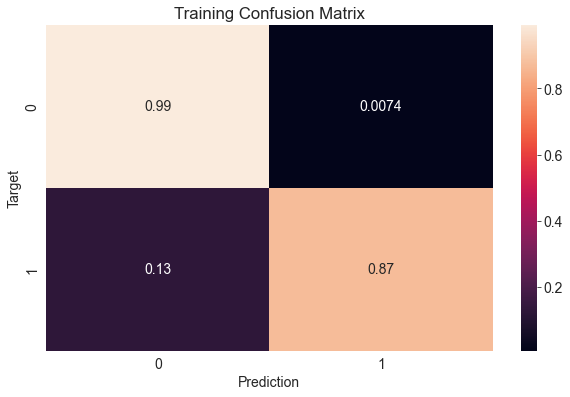

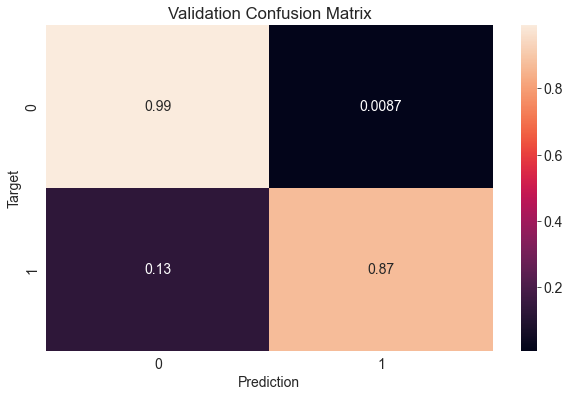

In [127]:
from sklearn.ensemble import RandomForestClassifier

# training the model
model = RandomForestClassifier(n_jobs=-1, random_state=42,
                          max_depth=6,max_leaf_nodes = 20,max_features ="log2")
model.fit(X_train,y_train)

check_model(model)

In [126]:
# Checking hyperparameters

p = ['gini']
q = ['log2']

for i in p:
    for j in q:
        model = RandomForestClassifier(n_jobs=-1, random_state=42,
                          max_depth=6,max_leaf_nodes = 20, criterion = i, max_features ="log2")
        model.fit(X_train,y_train)
        # make prediction
        y_train_preds = model.predict(X_train)
        y_val_preds = model.predict(X_val)
        print('param1: {} || Param 2: {} || Training score: {:.2f}% || Validation score: {:.2f}% '.format(i,j, accuracy_score(y_train, y_train_preds)*100,accuracy_score(y_val, y_val_preds)*100))
    

param1: gini || Param 2: log2 || Training score: 96.79% || Validation score: 96.70% 
